In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pandas as pd
from ipywidgets import interact, widgets
from sklearn.ensemble import RandomForestRegressor

Load Dataset

In [ ]:
df2 = pd.read_csv('test2.csv')
print("dataset info:")
print(df2.info())

In [2]:
df = pd.read_csv('test.csv')
print("dataset info:")
print(df.info())

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1724 non-null   int64  
 1   FoodGroup         1724 non-null   object 
 2   Descrip           1724 non-null   object 
 3   Energy_kcal       1724 non-null   float64
 4   Protein_g         1724 non-null   float64
 5   Fat_g             1724 non-null   float64
 6   Carb_g            1724 non-null   float64
 7   Sugar_g           1724 non-null   float64
 8   Fiber_g           1724 non-null   float64
 9   VitA_mcg          1724 non-null   float64
 10  VitB6_mg          1724 non-null   float64
 11  VitB12_mcg        1724 non-null   float64
 12  VitC_mg           1724 non-null   float64
 13  VitE_mg           1724 non-null   float64
 14  Folate_mcg        1724 non-null   float64
 15  Niacin_mg         1724 non-null   float64
 16  Riboflavin_mg     1724 non-n

In [3]:
print("\nDataset Statistics:")
print(df.describe())


Dataset Statistics:
                 ID  Energy_kcal    Protein_g        Fat_g       Carb_g  \
count   1724.000000  1724.000000  1724.000000  1724.000000  1724.000000   
mean   15535.180394   224.182135    11.552744    10.611079    21.245389   
std     9180.399893   166.619164    10.753444    15.598149    26.880839   
min     1001.000000     0.000000     0.000000     0.000000     0.000000   
25%     9037.750000    91.500000     2.530000     0.980000     0.047500   
50%    14277.500000   193.000000     8.100000     5.300000     8.690000   
75%    19900.250000   334.250000    19.862500    14.270000    30.880000   
max    90560.000000   902.000000    85.600000   100.000000    98.550000   

           Sugar_g      Fiber_g      VitA_mcg     VitB6_mg   VitB12_mcg  ...  \
count  1724.000000  1724.000000   1724.000000  1724.000000  1724.000000  ...   
mean      6.223950     2.007541     93.462297     0.258097     1.228747  ...   
std      12.923191     4.273536    682.209223     0.450614     

Preprocessing Data

In [4]:
# Pisahkan fitur nutrisi utama
nutrition_features = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g']
vitamin_features = ['VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg']
mineral_features = ['Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg', 'Zinc_mg']

Encoding FoodGroup

In [5]:
# Encoding untuk FoodGroup
le = LabelEncoder()
df['FoodGroup_Encoded'] = le.fit_transform(df['FoodGroup'])

Testing,Training dan Pembuatan Model

In [6]:
# Siapkan fitur dan target
X = df[nutrition_features + vitamin_features + mineral_features]
y = df['FoodGroup_Encoded']

In [7]:
# Cek ukuran data
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1724, 16), y shape: (1724,)


In [8]:
# Cek nilai yang hilang
print(X.isnull().sum())
print(y.isnull().sum())

Energy_kcal      0
Protein_g        0
Fat_g            0
Carb_g           0
Sugar_g          0
Fiber_g          0
VitA_mcg         0
VitB6_mg         0
VitB12_mcg       0
VitC_mg          0
VitE_mg          0
Calcium_mg       0
Iron_mg          0
Magnesium_mg     0
Phosphorus_mg    0
Zinc_mg          0
dtype: int64
0


In [9]:
# Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [10]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Evaluasi model
score = model.score(X_test, y_test)
print(f"Model accuracy: {score}")

Model accuracy: 0.6038899437235479


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 3.670635838150289
MSE: 25.610899421965318
R² Score: 0.6038899437235479


In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print("Mean R²:", scores.mean())


Cross-Validation R² Scores: [0.53997201 0.560999   0.59986223 0.57646769 0.59653732]
Mean R²: 0.5747676505033009


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fungsi Analisis

In [ ]:
def analyze_nutritional_content(food_item):
    """
    Menganalisis kandungan gizi dari makanan tertentu
    """
    nutrition_info = df[df['Descrip'] == food_item][nutrition_features].iloc[0]
    vitamin_info = df[df['Descrip'] == food_item][vitamin_features].iloc[0]
    mineral_info = df[df['Descrip'] == food_item][mineral_features].iloc[0]
    
    print(f"Nutritional Analysis for: {food_item}\n")
    print("Main Nutrients:")
    display(nutrition_info)
    print("\nVitamins:")
    display(vitamin_info)
    print("\nMinerals:")
    display(mineral_info)
    
    # Visualisasi
    plt.figure(figsize=(15, 5))
    
    # Plot makronutrien
    plt.subplot(1, 3, 1)
    nutrition_info[['Protein_g', 'Fat_g', 'Carb_g']].plot(kind='bar')
    plt.title('Macronutrients')
    plt.xlabel('Nutrients')
    plt.ylabel('Grams')
    
    # Plot vitamin
    plt.subplot(1, 3, 2)
    vitamin_info.plot(kind='bar')
    plt.title('Vitamins')
    plt.xticks(rotation=45)
    
    # Plot mineral
    plt.subplot(1, 3, 3)
    mineral_info.plot(kind='bar')
    plt.title('Minerals')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

In [ ]:
def calculate_bmi_and_needs(weight, height, age, gender, activity_level):
    """
    Menghitung BMI dan kebutuhan nutrisi
    """
    # Hitung BMI
    height_m = height / 100
    bmi = weight / (height_m ** 2)
    
    # Tentukan kategori BMI
    if bmi < 18.5:
        bmi_category = 'Underweight'
    elif 18.5 <= bmi < 25:
        bmi_category = 'Normal'
    elif 25 <= bmi < 30:
        bmi_category = 'Overweight'
    else:
        bmi_category = 'Obese'
    
    # Hitung BMR (Basal Metabolic Rate)
    if gender.lower() == 'm':
        bmr = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        bmr = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    
    # Activity factor
    activity_factors = {
            'Tidak banyak bergerak': 1.2,
            'Ringan': 1.375,
            'Sedang': 1.55,
            'Aktif': 1.725,
            'Sangat aktif': 1.9
    }
    
    # Hitung kebutuhan kalori
    daily_calories = bmr * activity_factors[activity_level]
    
    # Hitung kebutuhan nutrisi
    protein_needs = weight * 0.8  # 0.8g per kg body weight
    fat_needs = (daily_calories * 0.25) / 9  # 25% of calories from fat
    carb_needs = (daily_calories * 0.55) / 4  # 55% of calories from carbs
    
    results = {
        'BMI': round(bmi, 2),
        'Category': bmi_category,
        'Daily Calories': round(daily_calories),
        'Protein Needs (g)': round(protein_needs),
        'Fat Needs (g)': round(fat_needs),
        'Carb Needs (g)': round(carb_needs)
    }
    
    return pd.Series(results)

In [ ]:
def get_food_recommendations(bmi_category, daily_calories, restrictions=None):
    """
    Memberikan rekomendasi makanan berdasarkan BMI dan kalori
    """
    filtered_df = df.copy()
    
    # Filter berdasarkan restriksi diet
    if restrictions:
        for restriction in restrictions:
            filtered_df = filtered_df[~filtered_df['FoodGroup'].str.contains(restriction, na=False)]
    
    # Sesuaikan rekomendasi berdasarkan BMI
    if bmi_category == 'Underweight':
        # Prioritaskan makanan tinggi kalori dan protein
        filtered_df['score'] = (filtered_df['Energy_kcal']/500 + 
                              filtered_df['Protein_g']/20)
    elif bmi_category in ['Overweight', 'Obese']:
        # Prioritaskan makanan tinggi protein, rendah kalori
        filtered_df['score'] = (filtered_df['Protein_g']/20 + 
                              filtered_df['Fiber_g']/10 - 
                              filtered_df['Energy_kcal']/1000)
    else:
        # Seimbang untuk BMI normal
        filtered_df['score'] = (filtered_df['Protein_g']/20 + 
                              filtered_df['Fiber_g']/10 + 
                              filtered_df['VitC_mg']/60 + 
                              filtered_df['Calcium_mg']/1000)/4
    
    # Dapatkan rekomendasi terbaik
    recommendations = filtered_df.nlargest(5, 'score')
    return recommendations[['Descrip', 'FoodGroup', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Fiber_g']]

Penggunaan

Nutritional Analysis for: Beef, chuck, under blade steak, boneless, separable lean and fat, trimmed to 0" fat, all grades, cooked, braised

Main Nutrients:


Energy_kcal    275.00
Protein_g       28.23
Fat_g           18.00
Carb_g           0.00
Sugar_g          0.00
Fiber_g          0.00
Name: 0, dtype: float64


Vitamins:


VitA_mcg      8.000
VitB6_mg      0.312
VitB12_mcg    3.190
VitC_mg       0.000
VitE_mg       0.080
Name: 0, dtype: float64


Minerals:


Calcium_mg        14.00
Iron_mg            2.80
Magnesium_mg      20.00
Phosphorus_mg    181.00
Zinc_mg            9.55
Name: 0, dtype: float64

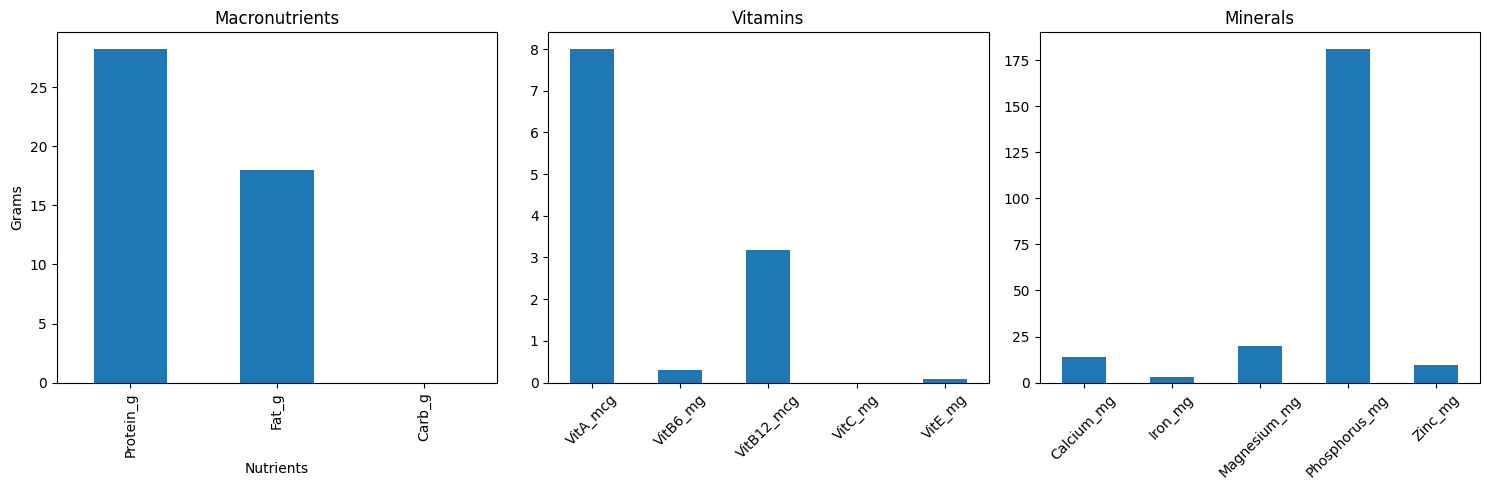

BMI                        13.84
Category             Underweight
Daily Calories              1524
Protein Needs (g)             32
Fat Needs (g)                 42
Carb Needs (g)               210
dtype: object

,Descrip,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Fiber_g
893,"Gelatins, dry powder, unsweetened",Sweets,335.0,85.60,0.10,0.00,0.0
1059,"Soy protein isolate, potassium type",Legumes and Legume Products,326.0,80.69,0.53,10.22,5.6
1535,Vital wheat gluten,Cereal Grains and Pasta,370.0,75.16,1.85,13.79,0.6
1712,"Snacks, pork skins, plain",Snacks,544.0,61.30,31.30,0.00,0.0
581,"Beverages, ABBOTT, EAS whey protein powder",Beverages,385.0,66.67,5.13,17.95,0.0


In [ ]:
# Analisis nutrisi untuk makanan tertentu
food_item = df['Descrip'].iloc[0]  # Ambil makanan pertama sebagai contoh
analyze_nutritional_content(food_item)

# Hitung BMI dan kebutuhan nutrisi
user_stats = calculate_bmi_and_needs(
    weight=40,  # kg
    height=170,  # cm
    age=30,
    gender='M',
    activity_level='Tidak banyak bergerak'
)
display(user_stats)

# Dapatkan rekomendasi makanan
recommendations = get_food_recommendations(
    bmi_category=user_stats['Category'],
    daily_calories=user_stats['Daily Calories'],
    restrictions=['Dairy']  # contoh restriksi
)
display(recommendations)

Input Interaktif

In [ ]:
# @interact
# def analyze_food(food_name=df['Descrip'].iloc[0]):
#     analyze_nutritional_content(food_name)

# @interact
# def get_personal_needs(
#     weight=widgets.FloatSlider(min=40, max=120, step=0.5, value=70),
#     height=widgets.FloatSlider(min=140, max=200, step=0.5, value=170),
#     age=widgets.IntSlider(min=18, max=80, step=1, value=30),
#     gender=widgets.Dropdown(options=['M', 'F'], value='M'),
#     activity_level=widgets.Dropdown(
#         options=['Tidak banyak bergerak', 'Ringan', 'Sedang', 'Aktif', 'Sangat Aktif'],
#         value='Tidak banyak bergerak'
#     )
# ):
    results = calculate_bmi_and_needs(weight, height, age, gender, activity_level)
    display(results)
    
    print("\nRecommended Foods:")
    recommendations = get_food_recommendations(
        results['Category'],
        results['Daily Calories']
    )
    display(recommendations)

interactive(children=(Text(value='Beef, chuck, under blade steak, boneless, separable lean and fat, trimmed to…

interactive(children=(FloatSlider(value=70.0, description='weight', max=120.0, min=40.0, step=0.5), FloatSlide…